In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
AST_data = pd.read_csv('C:/Users/matte/Downloads/Total Away Shots On Target/AST_clean.csv')
AST_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,HF,AF,HC,AC,HY,AY,HR,AR,AvgC_greater_than_2.5,AvgC_less_than_2.5,AST
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,4,0,1,1,6,25,1,16,11,0,6,2,1,0,0,1.34,3.29,10
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,8,3,3,6,20,9,8,9,14,8,7,1,2,0,0,1.62,2.31,6
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,3,0,2,2,24,17,5,9,9,4,2,0,1,0,0,1.65,2.26,8
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,5,2,1,3,11,13,7,13,10,4,5,1,2,0,0,1.68,2.19,6
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,5,2,0,2,19,4,9,5,12,7,0,1,1,0,0,1.64,2.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,4,1,1,2,7,20,5,6,14,3,10,1,1,0,0,1.55,2.45,11
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,2,1,0,1,13,13,5,15,17,7,3,3,3,0,0,1.35,3.14,11
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,3,0,3,4,13,4,8,13,4,9,4,0,2,1,1.50,2.55,3
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,7,2,2,4,12,18,8,3,7,5,4,0,2,0,0,1.32,3.34,11


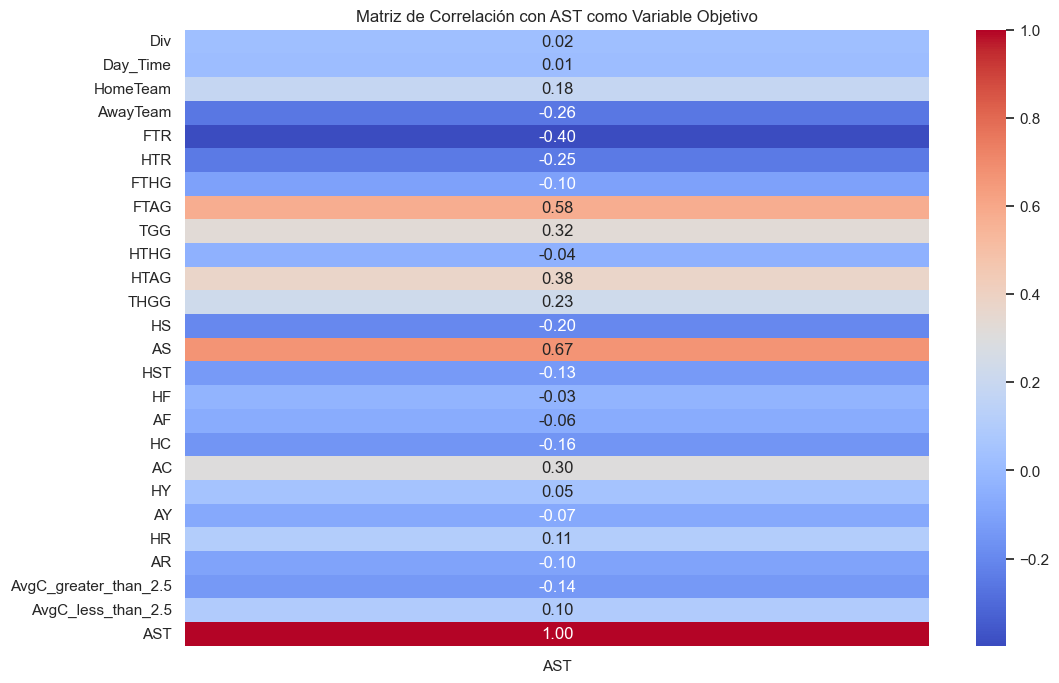

In [3]:
# Lista de variables objetivo
objective_variables = ['AST']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AST_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['AST']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AST_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AST_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AST:
     Feature        VIF
0        AST   9.795835
1   HomeTeam   3.726814
2   AwayTeam   3.692553
3        FTR   9.391684
4       FTHG   9.540612
5       FTAG   7.978087
6       HTHG   3.333739
7       HTAG   3.061283
8         AS  13.928249
9        HST   7.532806
10        HF   9.141669
11        AF   9.128589
12        HC   4.664840
13        AC   5.351473


In [5]:
AST_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5',
       'AvgC_less_than_2.5', 'AST'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['TGG', 'THGG', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5', 'AvgC_less_than_2.5']
AST_data = AST_data.drop(columns=columns_to_drop, errors='ignore')
AST_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,HF,AF,HC,AC,AST
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,0,1,6,25,1,16,11,0,6,10
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,3,3,20,9,8,9,14,8,7,6
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,0,2,24,17,5,9,9,4,2,8
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,2,1,11,13,7,13,10,4,5,6
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,2,0,19,4,9,5,12,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,1,1,7,20,5,6,14,3,10,11
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,1,0,13,13,5,15,17,7,3,11
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,0,4,13,4,8,13,4,9,3
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,2,2,12,18,8,3,7,5,4,11


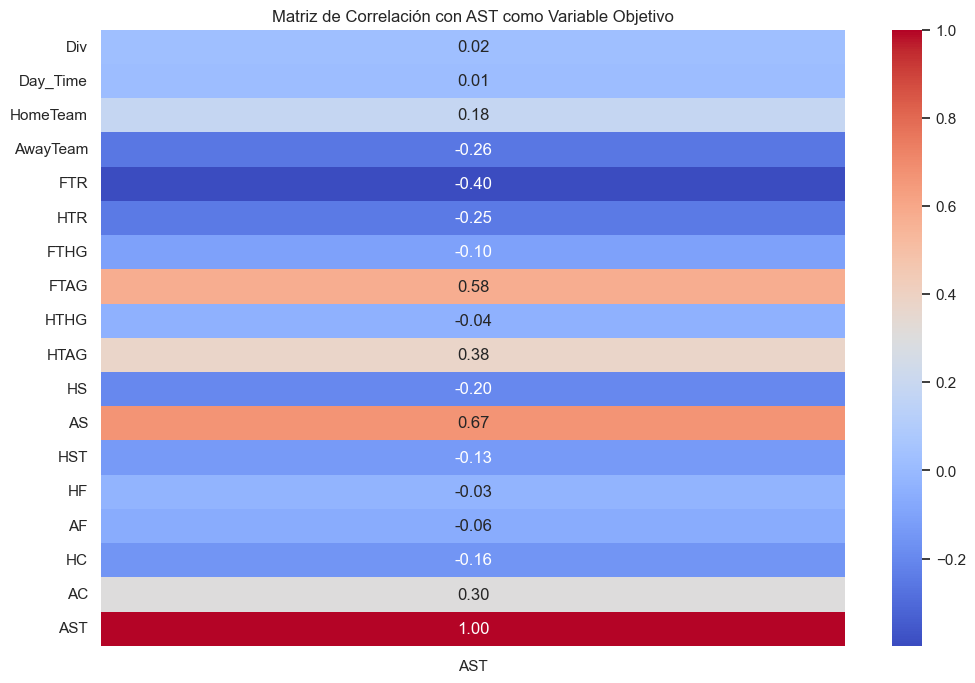

In [7]:
# Lista de variables objetivo
objective_variables = ['AST']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AST_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['AST']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AST_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AST_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AST:
     Feature        VIF
0        AST   9.861292
1        Div   3.304120
2   Day_Time   5.964623
3   HomeTeam   3.787803
4   AwayTeam   3.811516
5        FTR  11.073275
6        HTR  15.801525
7       FTHG  10.055648
8       FTAG   8.640903
9       HTHG   7.094143
10      HTAG   6.315657
11        HS  15.898707
12        AS  14.377382
13       HST  11.024699
14        HF   9.627924
15        AF   9.561152
16        HC   6.112173
17        AC   5.467444


In [9]:
# Eliminar las columnas especificadas
columns_to_drop = ['Div', 'Day_Time', 'HTR', 'HS']
AST_data = AST_data.drop(columns=columns_to_drop, errors='ignore')
AST_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,AS,HST,HF,AF,HC,AC,AST
0,11.0,0.0,0.0,0,4,0,1,25,1,16,11,0,6,10
1,13.0,3.0,1.0,4,4,3,3,9,8,9,14,8,7,6
2,9.0,7.0,0.0,1,2,0,2,17,5,9,9,4,2,8
3,4.0,2.0,2.0,3,2,2,1,13,7,13,10,4,5,6
4,10.0,15.0,2.0,5,0,2,0,4,9,5,12,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,20,5,6,14,3,10,11
8951,9.4,15.4,1.0,1,1,1,0,13,5,15,17,7,3,11
8952,16.4,10.4,2.0,3,0,3,0,13,4,8,13,4,9,3
8953,21.4,27.4,0.0,3,4,2,2,18,8,3,7,5,4,11


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['AST']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AST_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AST_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AST:
     Feature        VIF
0        AST   9.795835
1   HomeTeam   3.726814
2   AwayTeam   3.692553
3        FTR   9.391684
4       FTHG   9.540612
5       FTAG   7.978087
6       HTHG   3.333739
7       HTAG   3.061283
8         AS  13.928249
9        HST   7.532806
10        HF   9.141669
11        AF   9.128589
12        HC   4.664840
13        AC   5.351473


In [11]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = AST_data.drop(columns=['AST'])  # Características excluyendo la variable objetivo
y = AST_data['AST']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 2.641592238972641
R^2 Score: 0.5572791773771534


In [14]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 200}
R^2 Score después de ajuste de hiperparámetros: 0.5726432643369257


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=200)

In [16]:
importances = rf.feature_importances_

In [17]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

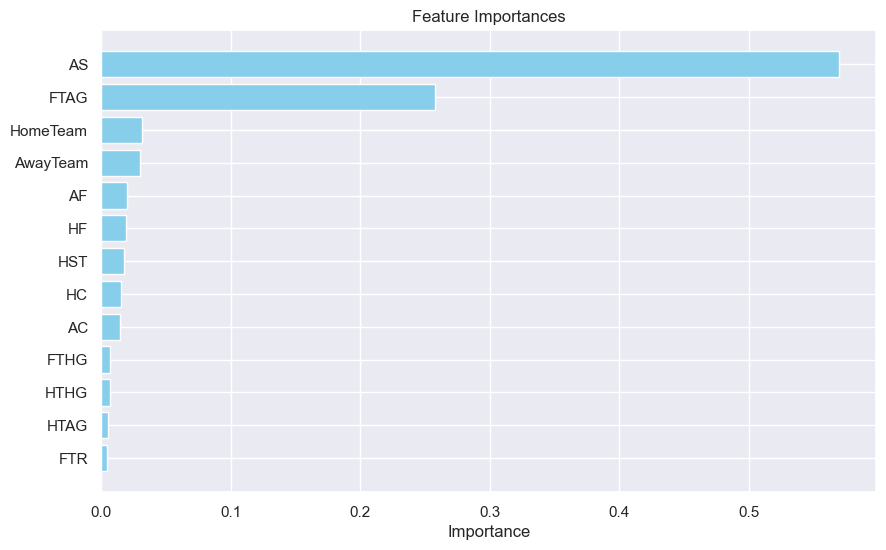

In [18]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [19]:
# Definir la variable objetivo específica
target_variable = 'AST'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = AST_data.drop(columns=[target_variable])
y = AST_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'AST' en el modelo de Random Forest:
1. AS: 0.4268245301967135
2. FTAG: 0.19146364896148776
3. HomeTeam: 0.06622547987921514
4. AwayTeam: 0.06537158412530536
5. AF: 0.045387541560529376
6. HF: 0.04467229340224685
7. HC: 0.03818463275472334
8. HST: 0.037654426770642464
9. AC: 0.03589072718832028
10. FTHG: 0.016066157136417267
11. HTHG: 0.014274192050949807
12. HTAG: 0.01066453506910652
13. FTR: 0.007320250904342206


In [43]:
AST_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,AS,HST,HF,AF,HC,AC,AST
0,11.0,0.0,0.0,0,4,0,1,25,1,16,11,0,6,10
1,13.0,3.0,1.0,4,4,3,3,9,8,9,14,8,7,6
2,9.0,7.0,0.0,1,2,0,2,17,5,9,9,4,2,8
3,4.0,2.0,2.0,3,2,2,1,13,7,13,10,4,5,6
4,10.0,15.0,2.0,5,0,2,0,4,9,5,12,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,20,5,6,14,3,10,11
8951,9.4,15.4,1.0,1,1,1,0,13,5,15,17,7,3,11
8952,16.4,10.4,2.0,3,0,3,0,13,4,8,13,4,9,3
8953,21.4,27.4,0.0,3,4,2,2,18,8,3,7,5,4,11


In [48]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data4 = pd.DataFrame({
    'HomeTeam': [1.10],  
    'AwayTeam': [0.10],
    'FTR': [2.0],
    'FTHG': [5],
    'FTAG': [1],
    'HTHG': [2],
    'HTAG': [0],  
    'AS': [15],
    'HST': [8],
    'HF': [17],
    'AF': [14],
    'HC': [4],
    'AC': [2],
})
# Hacer la predicción utilizando el modelo entrenado
predicted_AST = rf_model.predict(new_data4)
print(f"Predicción de AST para el nuevo partido: {predicted_AST}")

Predicción de AST para el nuevo partido: [5.23]
